In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
train_path = "chest_xray/train"
test_path = "chest_xray/test"

In [4]:
IMAGE_SIZE = [128,128]

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.3, min_lr=0.0000001
)
early_stop = EarlyStopping(
    patience=20,
    verbose=1,
    monitor="val_accuracy",
    mode="max",
    min_delta=0.001,
    restore_best_weights=True,
)

In [9]:
from tensorflow.keras.applications import Xception

# Xception

In [11]:
# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
#head
x = GlobalAveragePooling2D()(x)
head = Dense(2, activation='softmax')(x)
# Combining base and head 
model = Model(inputs=base.input, outputs=head)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss = 'categorical_crossentropy', 
              metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_6[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 16, 16, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_211 (Conv2D)            (None, 8, 8, 728)    186368      ['add_13[0][0]']                 
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 8, 8, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 8, 8, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 8, 8, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 8, 8, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 8, 8, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (Add)                   (None, 8, 8, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_21[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_22[0][0]']                 
 on)      

In [13]:
hist = model.fit(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/50
163/163 [==============================] - 82s 31ms/step - loss: 0.2566 - accuracy: 0.9049 - val_loss: 0.2754 - val_accuracy: 0.9199 - lr: 0.0100
Epoch 2/50
163/163 [==============================] - 72s 28ms/step - loss: 0.1166 - accuracy: 0.9613 - val_loss: 0.2462 - val_accuracy: 0.9279 - lr: 0.0100
Epoch 3/50
163/163 [==============================] - 71s 27ms/step - loss: 0.0863 - accuracy: 0.9686 - val_loss: 0.1694 - val_accuracy: 0.9343 - lr: 0.0100
Epoch 4/50
163/163 [==============================] - 71s 27ms/step - loss: 0.0700 - accuracy: 0.9766 - val_loss: 0.1776 - val_accuracy: 0.9391 - lr: 0.0100
Epoch 5/50
163/163 [==============================] - 70s 27ms/step - loss: 0.0602 - accuracy: 0.9803 - val_loss: 0.1951 - val_accuracy: 0.9311 - lr: 0.0100
Epoch 6/50
163/163 [==============================] - 71s 27ms/step - loss: 0.0539 - accuracy: 0.9814 - val_loss: 0.1731 - val_accuracy: 0.9391 - lr: 0.0100
Epoch 7/50
163/163 [============================>.] - ETA:

Epoch 26/50
163/163 [==============================] - 70s 27ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.2163 - val_accuracy: 0.9423 - lr: 7.2900e-06
Epoch 27/50
163/163 [==============================] - 72s 27ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.2084 - val_accuracy: 0.9407 - lr: 7.2900e-06
Epoch 28/50
163/163 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9962
Epoch 28: ReduceLROnPlateau reducing learning rate to 2.186999927289435e-06.
163/163 [==============================] - 70s 27ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.2205 - val_accuracy: 0.9423 - lr: 7.2900e-06
Epoch 29/50
163/163 [==============================] - 70s 27ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.2057 - val_accuracy: 0.9439 - lr: 2.1870e-06
Epoch 30/50
163/163 [==============================] - 70s 27ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.2042 - val_accuracy: 0.9423 - lr: 2.1870e-06
Epoch 30: early stopping


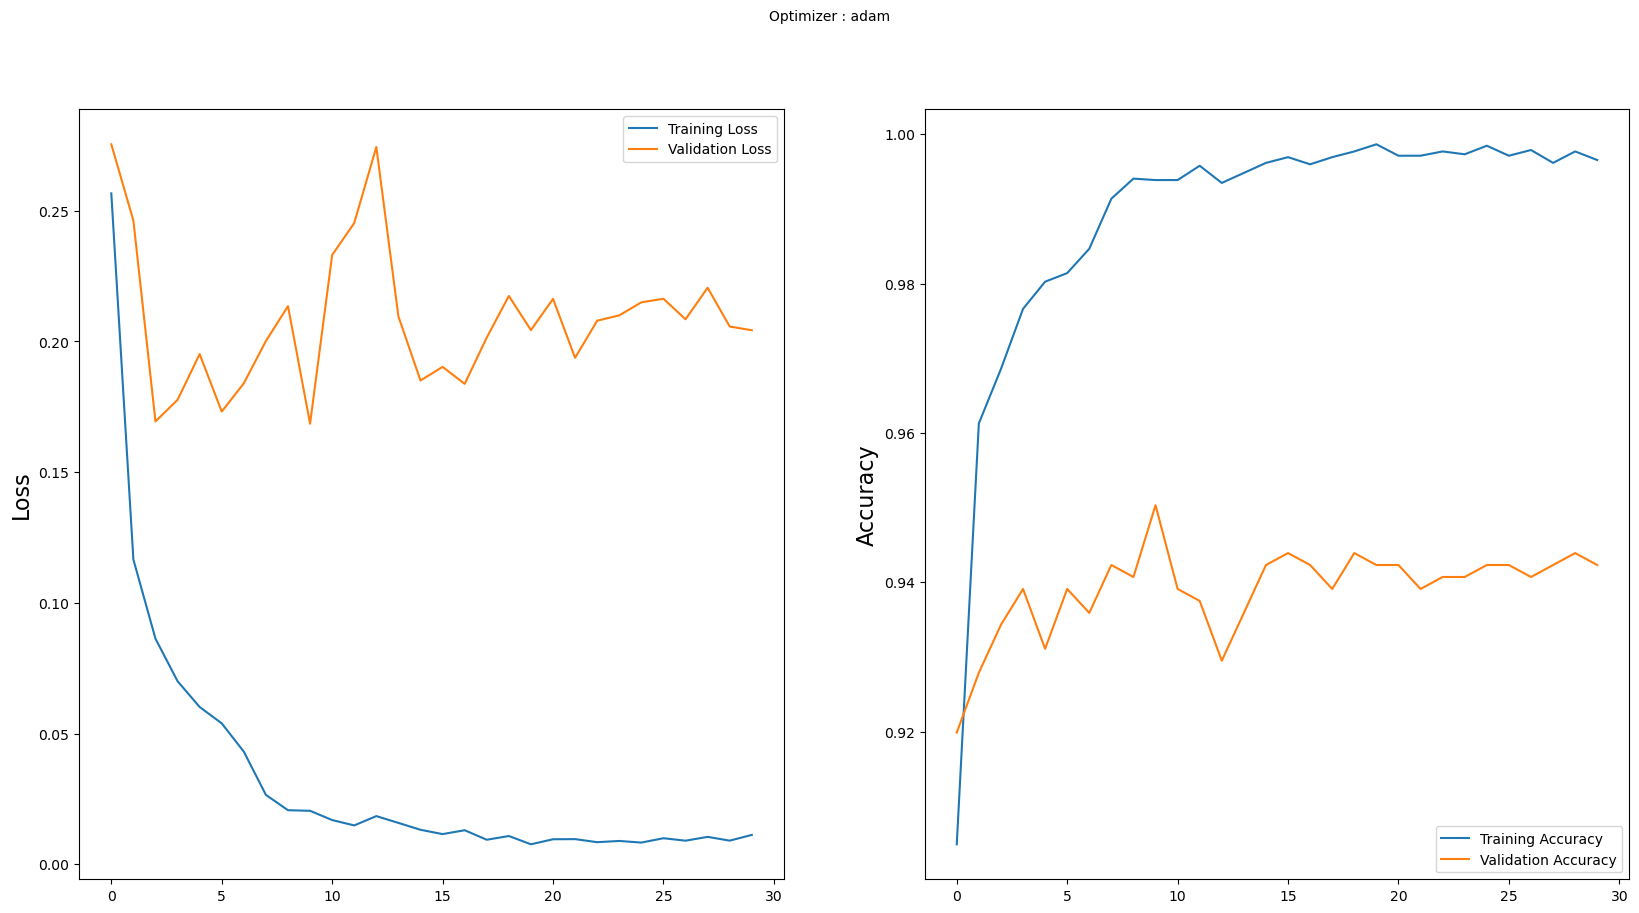

In [14]:
x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:
model.save('xception.h5')